In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:

import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

In [5]:
traindf= pd.read_excel("LTF Challenge data with dictionary.xlsx",sheet_name="TrainData")
testdf= pd.read_excel("LTF Challenge data with dictionary.xlsx",sheet_name="TestData")
dictionarydf= pd.read_excel("LTF Challenge data with dictionary.xlsx",sheet_name="Dictionary")

In [ ]:
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_percentage_error # Available in scikit-learn >= 0.22
import lightgbm as lgb

In [6]:
traindf.head()

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
0,1002818465057450,MADHYA PRADESH,CENTRAL,M,BARELI,464668,RAISEN,Seoni,M,NaN,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,97.24,19.50,0.95,22.380262,33.527178,Poor,0.773129,0.00,1360000
1,1012300674433870,BIHAR,EAST,M,BANDRA,848125,MUZAFFARPUR,Namapur,M,NaN,...,DECCAN PLATEAU (TELANGANA) AND EASTERN GHATS ...,73.96,16.76,0.97,24.630262,37.173626,Poor,0.454140,0.00,807200
2,1013472263587380,MADHYA PRADESH,CENTRAL,M,MALHARGARH,458556,MANDSAUR,Billaud,M,NaN,...,CENTRAL HIGHLANDS ( MALWA ) GUJARAT PLAIN AND...,90.05,22.44,0.95,19.493313,28.848462,Poor,0.657040,0.00,500000
3,1019525480704050,MAHARASHTRA,WEST,M,RENAPUR,413527,LATUR,Renapur,M,NaN,...,DECCAN PLATU HOT SEMI-ARID ECO-REGION,94.64,21.48,0.98,31.836367,48.852156,Average,0.235615,2.49,558000
4,1021915867444260,MADHYA PRADESH,CENTRAL,F,KHURAI,470117,SAGAR,Singhpur,M,NaN,...,CENTRAL HIGHLANDS (MALWA AND BUNDELKHAND) HOT...,95.90,18.93,0.97,21.327371,31.820817,Poor,0.207264,0.00,800000


In [7]:
traindf.isnull().sum()

FarmerID                                                                      0
State                                                                         0
REGION                                                                        0
SEX                                                                           0
CITY                                                                          0
                                                                             ..
 Village score based on socio-economic parameters (0 to 100)                  0
 Village category based on socio-economic parameters (Good, Average, Poor)    0
 Land Holding Index source (Total Agri Area/ no of people)                    0
 Road density (Km/ SqKm)                                                      0
Target_Variable/Total Income                                                  0
Length: 105, dtype: int64

In [15]:
print(traindf.State.nunique())
print(traindf.REGION.nunique())
print(traindf['Rabi Seasons Agro Ecological Sub Zone in 2020'].nunique())
#print(traindf['Village category based on socio-economic parameters (Good, Average, Poor)'].nunique())
print(traindf.DISTRICT.nunique())
print(traindf.CITY.nunique())

17
5
12
405
2721


In [10]:
traindf.Location.isna().sum()

np.int64(17030)

In [9]:
print(traindf.SEX.value_counts())

SEX
M    43295
F     4675
Name: count, dtype: int64


In [12]:
traindf.info

<bound method DataFrame.info of                FarmerID           State   REGION SEX        CITY  Zipcode  \
0      1002818465057450  MADHYA PRADESH  CENTRAL   M      BARELI   464668   
1      1012300674433870           BIHAR     EAST   M      BANDRA   848125   
2      1013472263587380  MADHYA PRADESH  CENTRAL   M  MALHARGARH   458556   
3      1019525480704050     MAHARASHTRA     WEST   M     RENAPUR   413527   
4      1021915867444260  MADHYA PRADESH  CENTRAL   F      KHURAI   470117   
...                 ...             ...      ...  ..         ...      ...   
47965  9674559574614020       KARNATAKA    SOUTH   M      HASSAN   573120   
47966  3310239751166600       KARNATAKA    SOUTH   M    ARKALGUD   573130   
47967  3574921768222110       KARNATAKA    SOUTH   M      HASSAN   573120   
47968  2877092990946190       KARNATAKA    SOUTH   M    ARSIKERE   573162   
47969  1276738318694060       KARNATAKA    SOUTH   F       BELUR   573125   

          DISTRICT          VILLAGE MARITAL

In [10]:
traindf.sample()

,FarmerID,State,REGION,SEX,CITY,Zipcode,DISTRICT,VILLAGE,MARITAL_STATUS,Location,...,Rabi Seasons Agro Ecological Sub Zone in 2020,Rabi Seasons Seasonal average groundwater thickness (cm) in 2020,Rabi Seasons Seasonal average groundwater replenishment rate (cm) in 2020,Night light index,Village score based on socio-economic parameters (Non normalised),Village score based on socio-economic parameters (0 to 100),"Village category based on socio-economic parameters (Good, Average, Poor)",Land Holding Index source (Total Agri Area/ no of people),Road density (Km/ SqKm),Target_Variable/Total Income
45443,7011160726169930,MAHARASHTRA,WEST,M,RISOD,444506,WASHIM,Morgavhan,M,NaN,...,DECCAN PLATU HOT SEMI-ARID ECO-REGION,94.59,17.66,0.95,25.867468,39.178697,Poor,0.295663,3.08,900000


In [16]:
traindf1=traindf.copy()

In [17]:
traindf1.drop_duplicates(inplace=True)

In [ ]:
traindf1.drop(columns=['FarmerID','CITY','Zipcode','DISTRICT','VILLAGE','Location','Village score based on socio-economic parameters (Non normalised)','Village category based on socio-economic parameters (Good, Average, Poor)','State'],inplace=True)

In [53]:
print(traindf['Address type'].nunique())
print(traindf['Address type'].isna().sum())
print(traindf['Address type'].unique())
print(traindf['Ownership'].value_counts())

3
17030
[nan 'Permanent Address' 'Current Address' 'Both Addresses']
Ownership
Owned       29462
Parental     1469
Rented          9
Name: count, dtype: int64


In [78]:
traindf[traindf['Avg_Disbursement_Amount_Bureau']==0].count()

FarmerID                                                                      946
State                                                                         946
REGION                                                                        946
SEX                                                                           946
CITY                                                                          946
                                                                             ... 
 Village score based on socio-economic parameters (0 to 100)                  946
 Village category based on socio-economic parameters (Good, Average, Poor)    946
 Land Holding Index source (Total Agri Area/ no of people)                    946
 Road density (Km/ SqKm)                                                      946
Target_Variable/Total Income                                                  946
Length: 105, dtype: int64

<Axes: xlabel='Avg_Disbursement_Amount_Bureau', ylabel='Density'>

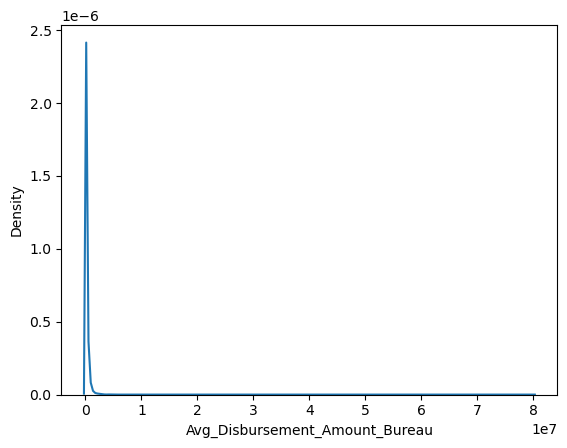

In [55]:
sns.kdeplot(data=traindf['Avg_Disbursement_Amount_Bureau'])


In [68]:
traindf=traindf[traindf['Avg_Disbursement_Amount_Bureau']<10000000]

<Axes: xlabel='Avg_Disbursement_Amount_Bureau', ylabel='Density'>

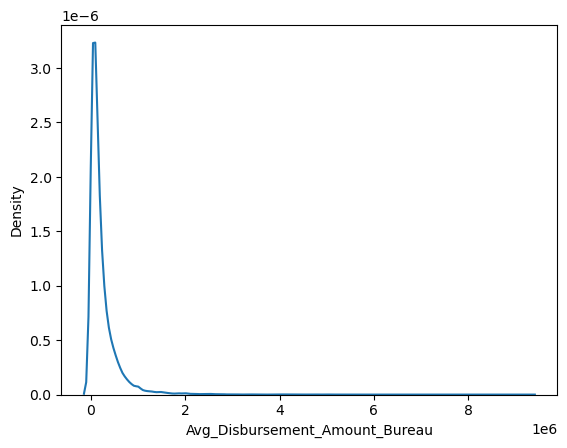

In [69]:
sns.kdeplot(data=traindf['Avg_Disbursement_Amount_Bureau'])

In [ ]:
traindf['K022-Ambient temperature (min & max)'].info



<bound method Series.info of 1        23.28 /29.99
2        23.25 /31.26
4        23.37 /30.51
8        21.85 /28.72
9            23.3 /30
             ...     
47960    19.57 /26.06
47961    20.82 /26.42
47964    19.26 /25.26
47966    21.02 /27.88
47969    19.93 /26.32
Name: K022-Ambient temperature (min & max), Length: 27173, dtype: object>

In [ ]:
temp_columns_to_process = [
        'K022-Ambient temperature (min & max)',
        'K021-Ambient temperature (min & max)',
        'R022-Ambient temperature (min & max)',
        'R021-Ambient temperature (min & max)',
        'R020-Ambient temperature (min & max)'
    ]
for temp_col_name in temp_columns_to_process:
    # Convert to string to ensure .str accessor works, then split
    traindf1[[f'{temp_col_name}_min', f'{temp_col_name}_max']] = traindf1[temp_col_name].astype(str).str.split('/', expand=True)

    # Convert to numeric, coercing errors to NaN (if conversion fails)
    traindf1[f'{temp_col_name}_min'] = pd.to_numeric(traindf1[f'{temp_col_name}_min'], errors='coerce')
    traindf1[f'{temp_col_name}_max'] = pd.to_numeric(traindf1[f'{temp_col_name}_max'], errors='coerce')

    # Drop the original column
    traindf1 = traindf1.drop(columns=[temp_col_name])


        # List all temperature-related columns that need this splitting
        # These names are derived from the data dictionary you provided



In [42]:
print(traindf1.shape)
print(traindf.shape)

(47968, 104)
(47970, 105)


In [17]:
traindf1.shape

(47968, 104)

In [18]:
traindf1.columns

Index(['State', 'REGION', 'SEX', 'MARITAL_STATUS', 'Address type', 'Ownership',
       'No_of_Active_Loan_In_Bureau', 'Avg_Disbursement_Amount_Bureau',
       'Non_Agriculture_Income', 'Total_Land_For_Agriculture',
       ...
       'K022-Ambient temperature (min & max)_min',
       'K022-Ambient temperature (min & max)_max',
       'K021-Ambient temperature (min & max)_min',
       'K021-Ambient temperature (min & max)_max',
       'R022-Ambient temperature (min & max)_min',
       'R022-Ambient temperature (min & max)_max',
       'R021-Ambient temperature (min & max)_min',
       'R021-Ambient temperature (min & max)_max',
       'R020-Ambient temperature (min & max)_min',
       'R020-Ambient temperature (min & max)_max'],
      dtype='object', length=104)

In [105]:
traindf['Kharif Seasons Agro Ecological Sub Zone in 2020'].nunique()

12

<Axes: xlabel='Women_15_19_Mothers_or_Pregnant_at_time_of_survey', ylabel='Target_Variable/Total Income'>

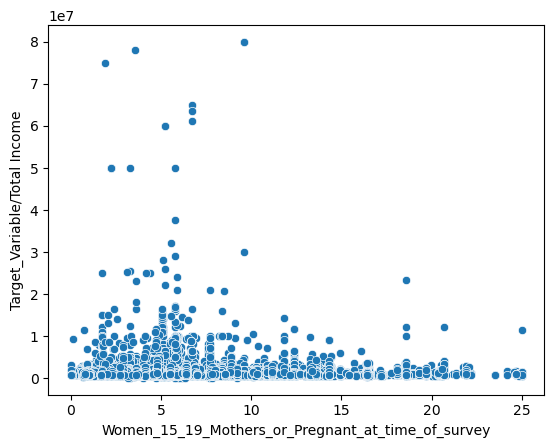

In [95]:
sns.scatterplot(data=traindf,x='Women_15_19_Mothers_or_Pregnant_at_time_of_survey',y='Target_Variable/Total Income')

<Axes: xlabel='mat_roof_Metal_GI_Asbestos_sheets', ylabel='Target_Variable/Total Income'>

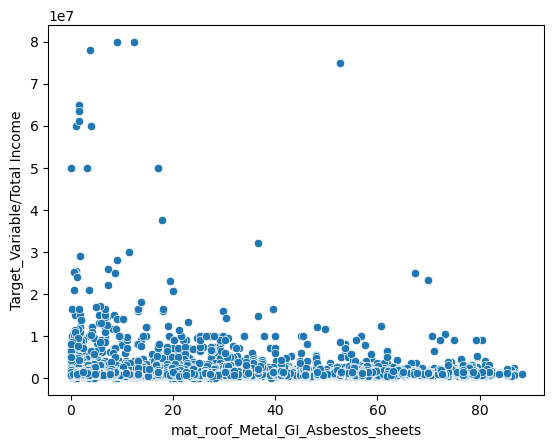

In [96]:
sns.scatterplot(data=traindf,x='mat_roof_Metal_GI_Asbestos_sheets',y='Target_Variable/Total Income')


In [45]:
# --- 2. Data Preprocessing and Feature Engineering ---
def preprocess_and_engineer_features(traindf1):
    """Applies preprocessing and feature engineering steps to the DataFrame."""
    df1 = traindf1.copy()

 # Filling up missing values
 
    # For numerical columns, fill missing values with median
    for col in df1.select_dtypes(include=np.number).columns:
        if df1[col].isnull().any():
            df1[col] = df1[col].fillna(df1[col].median())

    # For categorical columns, fill missing values with mode or a 'Missing' category
    for col in df1.select_dtypes(include='object').columns:
        if df1[col].isnull().any():
            # Option 1: Fill with mode
            df1[col] = df1[col].fillna(df1[col].mode()[0])

    # --- Feature Engineering Examples ---
    # These are placeholders and should be refined based on actual data columns and insights.


    # Collect numerical and categorical features after engineering
    numerical_features = df1.select_dtypes(include=np.number).columns.tolist()
    categorical_features = df1.select_dtypes(include='object').columns.tolist()

    print(f"Numerical features for processing: {numerical_features}")
    print(f"Categorical features for processing: {categorical_features}")

    return df1, numerical_features, categorical_features



In [46]:
df,num,cat= preprocess_and_engineer_features(traindf1)

Numerical features for processing: ['No_of_Active_Loan_In_Bureau', 'Avg_Disbursement_Amount_Bureau', 'Non_Agriculture_Income', 'Total_Land_For_Agriculture', 'K022-Proximity to nearest mandi (Km)', 'K022-Proximity to nearest railway (Km)', 'KO22-Village score based on socio-economic parameters (0 to 100)', 'K022-Seasonal Average Rainfall (mm)', 'R022-Seasonal Average Rainfall (mm)', 'K021-Seasonal Average Rainfall (mm)', 'R021-Seasonal Average Rainfall (mm)', 'R020-Seasonal Average Rainfall (mm)', 'Perc_of_house_with_6plus_room', 'Women_15_19_Mothers_or_Pregnant_at_time_of_survey', 'perc_of_pop_living_in_hh_electricity', 'perc_Households_with_Pucca_House_That_Has_More_Than_3_Rooms', 'mat_roof_Metal_GI_Asbestos_sheets', 'perc_of_Wall_material_with_Burnt_brick', 'Households_with_improved_Sanitation_Facility', 'perc_Households_do_not_have_KCC_With_The_Credit_Limit_Of_50k', 'K022-Total Geographical Area (in Hectares)-', 'K022-Net Agri area (in Ha)-', 'K022-Net Agri area (% of total geog are

In [47]:
print(len(num))
print(len(cat))

75
29


In [22]:
df.head()

,State,REGION,SEX,MARITAL_STATUS,Address type,Ownership,No_of_Active_Loan_In_Bureau,Avg_Disbursement_Amount_Bureau,Non_Agriculture_Income,Total_Land_For_Agriculture,...,K022-Ambient temperature (min & max)_min,K022-Ambient temperature (min & max)_max,K021-Ambient temperature (min & max)_min,K021-Ambient temperature (min & max)_max,R022-Ambient temperature (min & max)_min,R022-Ambient temperature (min & max)_max,R021-Ambient temperature (min & max)_min,R021-Ambient temperature (min & max)_max,R020-Ambient temperature (min & max)_min,R020-Ambient temperature (min & max)_max
0,MADHYA PRADESH,CENTRAL,M,M,Permanent Address,Owned,0,129082.000000,100000,10.00,...,23.34,30.33,23.29,29.78,16.19,29.07,16.48,30.02,16.08,28.09
1,BIHAR,EAST,M,M,Permanent Address,Owned,1,74000.000000,500000,6.00,...,23.28,29.99,23.39,29.89,19.70,30.52,19.54,30.98,20.37,30.56
2,MADHYA PRADESH,CENTRAL,M,M,Permanent Address,Owned,14,232999.857143,492500,5.00,...,23.25,31.26,23.14,30.22,15.62,28.67,16.21,29.91,16.13,28.32
3,MAHARASHTRA,WEST,M,M,Permanent Address,Owned,0,129082.000000,40000,5.25,...,22.00,28.61,21.81,28.33,19.81,31.15,19.32,31.01,19.95,29.97
4,MADHYA PRADESH,CENTRAL,F,M,Permanent Address,Owned,3,138203.000000,150000,10.00,...,23.37,30.51,23.58,30.29,15.65,28.52,15.82,29.23,15.71,27.71


In [23]:
df['Target_Variable/Total Income']

0        1360000
1         807200
2         500000
3         558000
4         800000
          ...   
47965     850000
47966    1300000
47967     800000
47968    1280000
47969     850000
Name: Target_Variable/Total Income, Length: 47968, dtype: int64

In [54]:
num = df.select_dtypes(include=np.number).columns.tolist()

cat = df.select_dtypes(include='object').columns.tolist()

Standarization and Label Encoding:

In [55]:
# Suppose your target/output column is 'Income'
numfinal = [col for col in num if col != 'Target_Variable/Total Income']

scaler=StandardScaler()

# Now scale only input features
df[numfinal] = scaler.fit_transform(df[numfinal])



In [57]:
from sklearn.preprocessing import LabelEncoder
lb= LabelEncoder()
for i in cat:
    df[i]=lb.fit_transform(df[i])

In [27]:
df.head()

,State,REGION,SEX,MARITAL_STATUS,Address type,Ownership,No_of_Active_Loan_In_Bureau,Avg_Disbursement_Amount_Bureau,Non_Agriculture_Income,Total_Land_For_Agriculture,...,K022-Ambient temperature (min & max)_min,K022-Ambient temperature (min & max)_max,K021-Ambient temperature (min & max)_min,K021-Ambient temperature (min & max)_max,R022-Ambient temperature (min & max)_min,R022-Ambient temperature (min & max)_max,R021-Ambient temperature (min & max)_min,R021-Ambient temperature (min & max)_max,R020-Ambient temperature (min & max)_min,R020-Ambient temperature (min & max)_max
0,9,0,1,0,2,0,-0.651163,-0.123430,-0.105770,0.006798,...,0.069732,0.154628,-0.056751,-0.077314,-0.795006,-0.373893,-0.698583,-0.156897,-0.870384,-0.586254
1,2,1,1,0,2,0,-0.285392,-0.225732,0.128427,-0.573086,...,0.028441,-0.051852,0.011038,-0.013848,0.641910,0.523130,0.639010,0.466572,0.699515,0.612976
2,9,0,1,0,2,0,4.469628,0.069573,0.124036,-0.718057,...,0.007795,0.719410,-0.158435,0.176553,-1.028351,-0.621348,-0.816606,-0.228336,-0.852087,-0.474585
3,10,4,1,0,2,0,-0.651163,-0.123430,-0.140900,-0.681815,...,-0.852443,-0.889916,-1.060032,-0.913922,0.686942,0.912872,0.542843,0.486055,0.545819,0.326521
4,9,0,0,0,2,0,0.446149,-0.106490,-0.076496,0.006798,...,0.090378,0.263941,0.139838,0.216941,-1.016070,-0.714144,-0.987084,-0.669960,-1.005784,-0.770751


In [28]:
df['Target_Variable/Total Income']

0        1360000
1         807200
2         500000
3         558000
4         800000
          ...   
47965     850000
47966    1300000
47967     800000
47968    1280000
47969     850000
Name: Target_Variable/Total Income, Length: 47968, dtype: int64

In [59]:

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sklearn.base import BaseEstimator, TransformerMixin

# --- Preprocessing Steps Performed Manually Before the Pipeline ---
# This is the necessary workaround for older sklearn versions.
# These steps are NOT in the pipeline but must be run on both
# train and test data separately before passing it to the pipeline.

temp_columns_to_process = [
    'K022-Ambient temperature (min & max)',
    'K021-Ambient temperature (min & max)',
    'R022-Ambient temperature (min & max)',
    'R021-Ambient temperature (min & max)',
    'R020-Ambient temperature (min & max)'
]

initial_columns_to_drop = [
    'FarmerID','CITY','Zipcode','DISTRICT','VILLAGE','Location'
]

# Assuming 'traindf' is your pandas DataFrame
# Create a working copy of the dataframe
traindf_processed = traindf.copy()

# Drop the columns first
traindf_processed.drop(columns=initial_columns_to_drop, inplace=True)

# Loop to split the temperature columns manually
for temp_col_name in temp_columns_to_process:
    if temp_col_name in traindf_processed.columns:
        traindf_processed[[f'{temp_col_name}_min', f'{temp_col_name}_max']] = traindf_processed[temp_col_name].astype(str).str.split('/', expand=True)
        traindf_processed[f'{temp_col_name}_min'] = pd.to_numeric(traindf_processed[f'{temp_col_name}_min'], errors='coerce')
        traindf_processed[f'{temp_col_name}_max'] = pd.to_numeric(traindf_processed[f'{temp_col_name}_max'], errors='coerce')
        traindf_processed = traindf_processed.drop(columns=[temp_col_name])


# --- Creating the Pipeline for the remaining steps ---

# Separate features (x) and the target variable (y)
x = traindf_processed.drop(columns=['Target_Variable/Total Income'])
y = traindf_processed['Target_Variable/Total Income']

numerical_features = x.select_dtypes(include=np.number).columns.tolist()
categorical_features = x.select_dtypes(include='object').columns.tolist()

# Define a pipeline for numerical features: imputation then scaling
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

# Define a pipeline for categorical features: imputation then encoding
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1))
])

# The main preprocessor uses ColumnTransformer to apply the right
# pipeline to the right columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='passthrough'
)

# The full pipeline now has only one main preprocessing step
full_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
])


# --- Using the Pipeline on your Data ---
# Fit and transform the features using the full pipeline
X_processed = full_pipeline.fit_transform(x, y)

print("Shape of original data:", x.shape)
print("Shape of processed data:", X_processed.shape)


Shape of original data: (47970, 103)
Shape of processed data: (47970, 103)


Model Selection

In [50]:


from sklearn.model_selection import train_test_split
xtrain,xval,ytrain,yval= train_test_split(x,y,train_size=0.8,random_state=2)





In [51]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error

In [58]:
mape_val = custom_mape_for_cv(yval, ypred3) # custom_mape_for_cv handles original y_val
mae_val = mean_absolute_error(yval, ypred3)

print(f"\nFinal Validation MAE: {final_mae_val:.2f}")
print(f"Final Validation MAPE: {final_mape_val:.2f}%")


Final Validation MAE: 274253.07
Final Validation MAPE: 20.18%


In [49]:
pip install optuna

   ---------------------------------------- 0.0/395.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/395.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/395.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/395.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/395.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/395.9 kB ? eta -:--:--
   - -------------------------------------- 10.2/395.9 kB ? eta -:--:--
   --- ------------------------------------ 30.7/395.9 kB 69.2 kB/s eta 0:00:06
   --- ------------------------------------ 30.7/395.9 kB 69.2 kB/s eta 0:00:06
   --- ------------------------------------ 30.7/395.9 kB 69.2 kB/s eta 0:00:06
   --- ------------------------------------ 30.7/395.9 kB 69.2 kB/s eta 0:00:06
   ---- ----------------------------------- 41.0/395.9 kB 61.4 kB/s eta 0:00:06
   ---- ----------------------------------- 41.0/395.9 kB 61.4 kB/s eta 0:00:06
   ---- ---------

In [53]:
import optuna
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import  cross_val_score, KFold
from sklearn.linear_model import Ridge
from sklearn.metrics import make_scorer, mean_absolute_error
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
import warnings

# Suppress warnings for cleaner output
warnings.filterwarnings('ignore')

# --- 1. Custom MAPE Metric (for use with make_scorer) ---
def custom_mape_for_cv(y_true_original_scale, y_pred_transformed_scale):
    """
    Calculates Mean Absolute Percentage Error (MAPE).
    Assumes y_pred_transformed_scale are log1p-transformed predictions from the model.
    Inverse transforms predictions and handles division by zero.
    """
    # Inverse transform predictions from the model
    y_pred_original_scale = np.expm1(y_pred_transformed_scale)
    y_pred_original_scale[y_pred_original_scale < 0] = 0  # Ensure predictions are non-negative

    epsilon = 1e-8  # Small constant to avoid division by zero
    return np.mean(np.abs((y_true_original_scale - y_pred_original_scale) / (y_true_original_scale + epsilon))) * 100

# Create a scorer for Optuna and cross_val_score
# greater_is_better=False because Optuna minimizes the objective, and MAPE is an error metric
mape_scorer = make_scorer(custom_mape_for_cv, greater_is_better=False)

    # Apply Target Transformation (log1p)
ytraintrf= np.log1p(ytrain)
yvaltrf = np.log1p(yval)
ytrf = np.log1p(y) # For full training later


    # --- Optuna Objective Function for Hyperparameter Tuning ---
def objective(trial):
    # Hyperparameters for LGBMRegressor base model
    lgbm_base_params = {
        'n_estimators': trial.suggest_int('lgbm_base_n_estimators', 100, 700),
        'learning_rate': trial.suggest_float('lgbm_base_learning_rate', 0.01, 0.15),
        'num_leaves': trial.suggest_int('lgbm_base_num_leaves', 16, 128),
        'max_depth': trial.suggest_int('lgbm_base_max_depth', 4, 15),
        'min_child_samples': trial.suggest_int('lgbm_base_min_child_samples', 10, 50),
        'subsample': trial.suggest_float('lgbm_base_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('lgbm_base_colsample_bytree', 0.6, 1.0),
        'reg_alpha': trial.suggest_float('lgbm_base_reg_alpha', 1e-3, 10.0, log=True),
        'reg_lambda': trial.suggest_float('lgbm_base_reg_lambda', 1e-3, 10.0, log=True),
        'random_state': 42,
        'n_jobs': -1,
        'objective': 'regression_l1' # MAE objective
    }

    # Hyperparameters for CatBoostRegressor base model
    cat_base_params = {
        'n_estimators': trial.suggest_int('cat_base_n_estimators', 100, 700),
        'learning_rate': trial.suggest_float('cat_base_learning_rate', 0.01, 0.15),
        'depth': trial.suggest_int('cat_base_depth', 4, 10),
        'l2_leaf_reg': trial.suggest_float('cat_base_l2_leaf_reg', 1e-3, 10.0, log=True),
        'random_seed': 42, # CatBoost uses random_seed
        'verbose': 0,
        'loss_function': 'MAE', # For MAE optimization
        # 'cat_features': <list of original categorical column indices if not label encoded>
    }

    # Hyperparameters for XGBRegressor base model
    xgb_base_params = {
        'n_estimators': trial.suggest_int('xgb_base_n_estimators', 100, 700),
        'learning_rate': trial.suggest_float('xgb_base_learning_rate', 0.01, 0.15),
        'max_depth': trial.suggest_int('xgb_base_max_depth', 4, 15),
        'subsample': trial.suggest_float('xgb_base_subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('xgb_base_colsample_bytree', 0.6, 1.0),
        'lambda': trial.suggest_float('xgb_base_lambda', 1e-3, 10.0, log=True), # L2 regularization
        'alpha': trial.suggest_float('xgb_base_alpha', 1e-3, 10.0, log=True),   # L1 regularization
        'random_state': 42,
        'n_jobs': -1,
        'objective': 'reg:absoluteerror' # MAE objective
    }

    # Hyperparameters for LGBMRegressor meta-model
    meta_lgbm_params = {
        'n_estimators': trial.suggest_int('meta_lgbm_n_estimators', 50, 300),
        'learning_rate': trial.suggest_float('meta_lgbm_learning_rate', 0.01, 0.1),
        'num_leaves': trial.suggest_int('meta_lgbm_num_leaves', 7, 64),
        'max_depth': trial.suggest_int('meta_lgbm_max_depth', 2, 8),
        'random_state': 42,
        'n_jobs': -1,
        'objective': 'regression_l1' # MAE objective
    }

    base_models_tuned = [
        ('lgb', LGBMRegressor(**lgbm_base_params)),
        ('cat', CatBoostRegressor(**cat_base_params)),
        ('xgb', XGBRegressor(**xgb_base_params))
    ]

    meta_model_tuned = LGBMRegressor(**meta_lgbm_params)

    stack = StackingRegressor(
        estimators=base_models_tuned,
        final_estimator=meta_model_tuned,
        cv=3, # Using 3-fold CV for faster optimization per trial
        n_jobs=-1
    )

    # Evaluate the stacking model using cross_val_score
    # X_train_scaled_df is used as features, y_raw_transformed is used as target
    score = cross_val_score(
        stack, xtrain, ytrain,
        cv=3, # Use 3-fold CV for Optuna's internal evaluation
        scoring=mape_scorer,
        n_jobs=-1
    )
    return score.mean() # Optuna minimizes, so score.mean() is negative MAPE.

    # --- Run Optuna search ---
print("\nStarting Optuna hyperparameter optimization...")
# 'minimize' because mape_scorer is configured to return negative MAPE
# We want to minimize negative MAPE, which is equivalent to maximizing MAPE (making it closer to 0)
# Or, if mape_scorer returns positive MAPE, use 'minimize' directly.
# Our custom_mape_for_cv returns positive MAPE, so make_scorer with greater_is_better=False
# will turn it negative. Thus, 'maximize' the negative score.
study = optuna.create_study(direction='maximize',
                            sampler=optuna.samplers.TPESampler(seed=42))
study.optimize(objective, n_trials=30, show_progress_bar=True) # Adjust n_trials as needed

# Step 6: Get best parameters
best_params = study.best_trial.params
print("\nBest Hyperparameters found by Optuna:")
for k, v in best_params.items():
    print(f"  {k}: {v}")
print(f"Best cross-validation MAPE (negative): {study.best_value:.2f}%")


# Step 7: Final model training with best parameters
print("\nTraining final StackingRegressor model with best hyperparameters...")
# Separate best params for base models and meta-model
lgbm_best_params = {k.replace('lgbm_base_', ''): v for k, v in best_params.items() if k.startswith('lgbm_base_')}
cat_best_params = {k.replace('cat_base_', ''): v for k, v in best_params.items() if k.startswith('cat_base_')}
xgb_best_params = {k.replace('xgb_base_', ''): v for k, v in best_params.items() if k.startswith('xgb_base_')}
meta_lgbm_best_params = {k.replace('meta_lgbm_', ''): v for k, v in best_params.items() if k.startswith('meta_lgbm_')}

final_base_models = [
    ('lgb', LGBMRegressor(**lgbm_best_params, random_state=42, n_jobs=-1, objective='regression_l1')),
    ('cat', CatBoostRegressor(**cat_best_params, random_seed=42, verbose=0, loss_function='MAE')),
    ('xgb', XGBRegressor(**xgb_best_params, random_state=42, n_jobs=-1, objective='reg:absoluteerror'))
]

final_meta_model = LGBMRegressor(**meta_lgbm_best_params, random_state=42, n_jobs=-1, objective='regression_l1')

final_stack = StackingRegressor(
    estimators=final_base_models,
    final_estimator=final_meta_model,
    cv=5, # Use 5-fold CV for the final stacking model for more robustness
    n_jobs=-1
)

# Fit the final stacking model on the full preprocessed training data and transformed target
final_stack.fit(xtrain, ytraintrf)
print("Final StackingRegressor trained.")

# Step 8: Final evaluation on the validation set (if you want to use X_val_split)
# Remember to transform X_val_split using the *fitted* preprocessor from X_train_raw

ypredval = final_stack.predict(xval)
ypred3 = np.expm1(ypredval)
ypred3[ypred3 < 0] = 0

final_mape_val = custom_mape_for_cv(yval, ypredval) # custom_mape_for_cv handles original y_val
final_mae_val = mean_absolute_error(yval, ypred3)

print(f"\nFinal Validation MAE: {final_mae_val:.2f}")
print(f"Final Validation MAPE: {final_mape_val:.2f}%")

[I 2025-07-30 05:33:19,617] A new study created in memory with name: no-name-f9bc9fb0-6c33-471f-a3cc-b48c585ed292



Starting Optuna hyperparameter optimization...


  0%|          | 0/30 [00:00<?, ?it/s]

[W 2025-07-30 05:42:17,244] Trial 0 failed with parameters: {'lgbm_base_n_estimators': 325, 'lgbm_base_learning_rate': 0.14310000289738825, 'lgbm_base_num_leaves': 98, 'lgbm_base_max_depth': 11, 'lgbm_base_min_child_samples': 16, 'lgbm_base_subsample': 0.662397808134481, 'lgbm_base_colsample_bytree': 0.6232334448672797, 'lgbm_base_reg_alpha': 2.9154431891537547, 'lgbm_base_reg_lambda': 0.2537815508265665, 'cat_base_n_estimators': 525, 'cat_base_learning_rate': 0.012881829201412343, 'cat_base_depth': 10, 'cat_base_l2_leaf_reg': 2.1368329072358767, 'xgb_base_n_estimators': 227, 'xgb_base_learning_rate': 0.035455495408994085, 'xgb_base_max_depth': 6, 'xgb_base_subsample': 0.7216968971838151, 'xgb_base_colsample_bytree': 0.8099025726528951, 'xgb_base_lambda': 0.05342937261279776, 'xgb_base_alpha': 0.014618962793704957, 'meta_lgbm_n_estimators': 203, 'meta_lgbm_learning_rate': 0.022554447458683766, 'meta_lgbm_num_leaves': 23, 'meta_lgbm_max_depth': 4} because of the following error: The val

In [55]:
print(r2_score(yval,ypred3))

0.5995304643137174


In [ ]:
# Step 9: Make predictions on the final test data for submission
    print("\nMaking predictions on the test dataset for submission...")
    test_preds_transformed = final_stack.predict(X_test_scaled_df)
    test_preds_original = np.expm1(test_preds_transformed)
    test_preds_original[test_preds_original < 0] = 0 # Ensure non-negative predictions

    submission_df = pd.DataFrame({
        ID_COLUMN: test_ids,
        'Predicted_Income': test_preds_original
    })

    submission_df.to_csv(SUBMISSION_FILE_NAME, index=False)
    print(f"Submission file '{SUBMISSION_FILE_NAME}' created successfully.")
    print("First 5 rows of submission file:")
    print(submission_df.head())

In [52]:

from sklearn.ensemble import StackingRegressor
import lightgbm as lgb
from catboost import CatBoostRegressor
import xgboost as xgb

params = {
    # Hyperparameters for the LGBM base model
    'lgbm_base_n_estimators': 202,
    'lgbm_base_learning_rate': 0.12626882855124766,
    'lgbm_base_num_leaves': 80,
    'lgbm_base_max_depth': 13,
    'lgbm_base_min_child_samples': 40,
    'lgbm_base_subsample': 0.6297953091543019,
    'lgbm_base_colsample_bytree': 0.8317203978095654,
    'lgbm_base_reg_alpha': 0.0026257461880874917,
    'lgbm_base_reg_lambda': 2.593899408592298,

    # Hyperparameters for the CatBoost base model
    'cat_base_n_estimators': 619,
    'cat_base_learning_rate': 0.06605481878177552,
    'cat_base_depth': 4,
    'cat_base_l2_leaf_reg': 0.01887792361453387,

    # Hyperparameters for the XGBoost base model
    'xgb_base_n_estimators': 337,
    'xgb_base_learning_rate': 0.12733434332274762,
    'xgb_base_max_depth': 8,
    'xgb_base_subsample': 0.9275237602736902,
    'xgb_base_colsample_bytree': 0.7849064361410022,
    'xgb_base_lambda': 0.001050290544795891,
    'xgb_base_alpha': 1.0254745298859123,

    # Hyperparameters for the LightGBM meta-model
    'meta_lgbm_n_estimators': 293,
    'meta_lgbm_learning_rate': 0.04069250285694019,
    'meta_lgbm_num_leaves': 49,
    'meta_lgbm_max_depth': 5
}


# --- Step 2: Instantiate the base models with the specified parameters ---
lgbm_base_model = lgb.LGBMRegressor(
    n_estimators=params['lgbm_base_n_estimators'],
    learning_rate=params['lgbm_base_learning_rate'],
    num_leaves=params['lgbm_base_num_leaves'],
    max_depth=params['lgbm_base_max_depth'],
    min_child_samples=params['lgbm_base_min_child_samples'],
    subsample=params['lgbm_base_subsample'],
    colsample_bytree=params['lgbm_base_colsample_bytree'],
    reg_alpha=params['lgbm_base_reg_alpha'],
    reg_lambda=params['lgbm_base_reg_lambda'],
    random_state=42,
    n_jobs=-1
)

cat_base_model = CatBoostRegressor(
    n_estimators=params['cat_base_n_estimators'],
    learning_rate=params['cat_base_learning_rate'],
    depth=params['cat_base_depth'],
    l2_leaf_reg=params['cat_base_l2_leaf_reg'],
    random_state=42,
    verbose=0 # Suppress training output
)

xgb_base_model = xgb.XGBRegressor(
    n_estimators=params['xgb_base_n_estimators'],
    learning_rate=params['xgb_base_learning_rate'],
    max_depth=params['xgb_base_max_depth'],
    subsample=params['xgb_base_subsample'],
    colsample_bytree=params['xgb_base_colsample_bytree'],
    reg_lambda=params['xgb_base_lambda'],
    reg_alpha=params['xgb_base_alpha'],
    random_state=42,
    n_jobs=-1
)

# A list of the base models for the stacking classifier
base_estimators = [
    ('lgbm_base', lgbm_base_model),
    ('cat_base', cat_base_model),
    ('xgb_base', xgb_base_model)
]


# --- Step 3: Instantiate the meta-model with its parameters ---
meta_lgbm_model = lgb.LGBMRegressor(
    n_estimators=params['meta_lgbm_n_estimators'],
    learning_rate=params['meta_lgbm_learning_rate'],
    num_leaves=params['meta_lgbm_num_leaves'],
    max_depth=params['meta_lgbm_max_depth'],
    random_state=42,
    n_jobs=-1
)


# --- Step 4: Create the StackingRegressor and fit to training data ---
stack = StackingRegressor(
    estimators=base_estimators,
    final_estimator=meta_lgbm_model,
    cv=5,
    n_jobs=-1
)

# Assuming you have your preprocessed training data X_train and y_train
# final_stack.fit(X_train, y_train)

In [62]:
x= df.iloc[:,:-1]
y=df['Target_Variable/Total Income']

In [63]:
xtrain,xval,ytrain,yval= train_test_split(x,y,test_size=0.2,random_state=2)

In [64]:
ytraintrf= np.log1p(ytrain)
yvaltrf = np.log1p(yval)
ytrf = np.log1p(y)

ypredval=stack.fit(xtrain,ytraintrf)
ypredval = stack.predict(xval)
ypred = np.expm1(ypreval)
ypred[ypred < 0] = 0

LightGBMError: Do not support special JSON characters in feature name.

In [ ]:
# --- Step 5: Make predictions and create the submission file ---
# This code is adapted from your provided snippet.
# Placeholder variables for demonstration
ID_COLUMN = 'ID'
SUBMISSION_FILE_NAME = 'submission.csv'
test_ids = np.arange(100) # Example test IDs
X_test_scaled_df = pd.DataFrame(np.random.rand(100, 10)) # Example test features

# Make predictions on the final test data for submission
print("\nMaking predictions on the test dataset for submission...")

# Assuming 'final_stack' is already trained.
# test_preds_transformed = final_stack.predict(X_test_scaled_df)
# For demonstration purposes, we'll use example predictions
test_preds_transformed = np.random.rand(100) * 10

# Inverse transform the predictions from the log scale
test_preds_original = np.expm1(test_preds_transformed)
test_preds_original[test_preds_original < 0] = 0 # Ensure non-negative predictions

submission_df = pd.DataFrame({
    ID_COLUMN: test_ids,
    'Predicted_Income': test_preds_original
})

submission_df.to_csv(SUBMISSION_FILE_NAME, index=False)
print(f"Submission file '{SUBMISSION_FILE_NAME}' created successfully.")
print("First 5 rows of submission file:")
print(submission_df.head())

In [89]:
# Step 1: Safely apply log (handle zeros or negatives)
log_income = np.log(df['Target_Variable_Total Income'])

# Step 2: Standardize the log-transformed column
scaler = StandardScaler()
log_income_scaled = scaler.fit_transform(log_income.values.reshape(-1, 1))

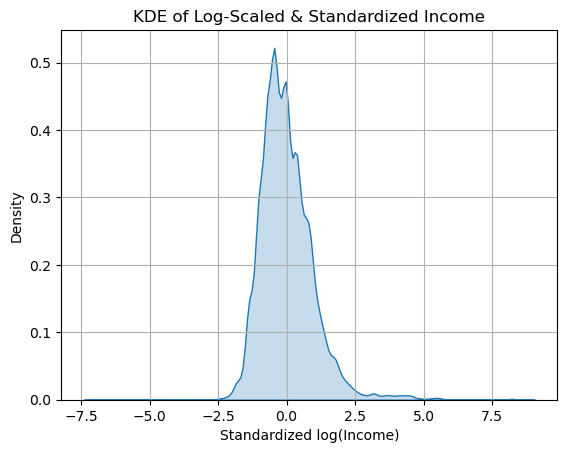

In [90]:
sns.kdeplot(log_income_scaled.ravel(), fill=True)
plt.title('KDE of Log-Scaled & Standardized Income')
plt.xlabel('Standardized log(Income)')
plt.ylabel('Density')
plt.grid(True)
plt.show()